In [135]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import requests
import time
from bs4 import BeautifulSoup

df = pd.read_excel('UniversityData_All_Majors.xlsx', sheet_name='Automated')

df.head()

Crname= df['Course Name'].values
Cwebsite = df['Course Website'].values
tag = df['Tag'].values
clname= df['Class Name'].values

found=[]
contents=[]
termsCount = []
future_of_work_terms = ['Foresight','Forecast','Long range planning','Anticipation','anticipate','Trend',
                      'Megatrend','wild card','Black Swans']


In [136]:
import matplotlib.pyplot as plt

In [137]:
df.shape

(80, 12)

In [138]:
df.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Tag', 'Class Name'],
      dtype='object')

In [139]:
df['Course Website'].dropna(inplace=True)

In [140]:
for i in range(len(Crname)):
    pageLink = Cwebsite[i]
    response = requests.get(pageLink, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',})
    html = response.content  # get the html
    time.sleep(2)  # wait 2 secs
    soup = BeautifulSoup(html.decode('ascii', 'ignore'), 'lxml')  # parse the html
    reviews = soup.findAll(tag[i], {'class': clname[i]})  # get all the review divs
    for review in reviews:
        content = review.text.lower()
        contents.append(content)
        flag=0
        terms=[]
        for each in future_of_work_terms:
            if each.lower() in content:
                terms.append(each.lower())
                flag=1
        if flag ==1:
            found.append(terms)
            termsCount.append(len(terms))
        if flag!=1:
            found.append('No Future of work Terms Found')       
            termsCount.append(0)
        
print(len(found))
print(len(contents))
print(len(termsCount))
        
newdf= df

newdf = newdf.drop(['Tag', 'Class Name'], axis=1)

newdf['Course Curriculum']= contents
newdf['FOW Terms']=found
newdf['Terms Count']=termsCount

newdf.head()


80
80
80


,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum,FOW Terms,Terms Count
0,30.0,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,TO 433,Artificial Intelligence for Business,Elective,https://michiganross.umich.edu/courses/artific...,artificial intelligence for business --- we ar...,No Future of work Terms Found,0
1,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,TO 435,Behavioral Economics and Behavioral Operations,Elective,https://michiganross.umich.edu/courses/behavio...,behavioral economics and behavioral operations...,No Future of work Terms Found,0
2,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,MO 300,Behavioral Theory in Management,Core,https://michiganross.umich.edu/courses/behavio...,behavioral theory in management --- this cours...,No Future of work Terms Found,0
3,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,BL 300,Business Law and Ethics,Core,https://michiganross.umich.edu/courses/busines...,business law and ethics --- this is a core cou...,No Future of work Terms Found,0
4,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,BL 310,Negotiation and Dispute Resolution,Elective,https://michiganross.umich.edu/courses/negotia...,negotiation and dispute resolution --- the abi...,No Future of work Terms Found,0


In [141]:
import pandas as pd

In [142]:
df2 = pd.read_excel('UniversityData_All_Majors.xlsx', sheet_name='Manual')
df2.head()

,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum
0,1.0,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,Management: General Track BS,MGMT 238,Organizational Behavior,Core,https://catalog.upenn.edu/search/?P=MGMT%20238,Management 238 is an organizational behavior c...
1,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 111,Multinational Management,Elective,https://catalog.upenn.edu/search/?P=MGMT%20111,Most successful firms go global in some way; w...
2,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 237,Management of Technology,Elective,https://catalog.upenn.edu/search/?P=MGMT%20237,The course is designed to meet the needs of th...
3,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 291,Negotiations,Elective,https://catalog.upenn.edu/search/?P=MGMT%20291,This course examines the art and science of ne...
4,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 292,Advanced Negotiation,Elective,https://catalog.upenn.edu/search/?P=MGMT%20292,This course is designed to teach negotiation p...


In [143]:

found1=[]
contents1=[]
termsCount1 = []
Cdescription = df2['Course Curriculum'].values

for review in Cdescription:
    content = review.lower()
    # contents.append(content)
    flag=0
    terms=[]
    for each in future_of_work_terms:
        if each.lower() in content:
            terms.append(each.lower())
            flag=1
    if flag ==1:
        found1.append(terms)
        termsCount1.append(len(terms))
    if flag!=1:
        found1.append('No Future of Work Terms Found')       
        termsCount1.append(0)
        
print(len(found1))
# print(len(contents))
print(len(termsCount1))
        


500
500


In [144]:
df2.shape

(500, 11)

In [145]:
newdf2= df2


# newdf2['Course Curriculum']= contents
newdf2['FOW Terms']=found1
newdf2['Terms Count']=termsCount1

newdf2.head()

,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum,FOW Terms,Terms Count
0,1.0,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,Management: General Track BS,MGMT 238,Organizational Behavior,Core,https://catalog.upenn.edu/search/?P=MGMT%20238,Management 238 is an organizational behavior c...,No Future of Work Terms Found,0
1,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 111,Multinational Management,Elective,https://catalog.upenn.edu/search/?P=MGMT%20111,Most successful firms go global in some way; w...,No Future of Work Terms Found,0
2,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 237,Management of Technology,Elective,https://catalog.upenn.edu/search/?P=MGMT%20237,The course is designed to meet the needs of th...,No Future of Work Terms Found,0
3,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 291,Negotiations,Elective,https://catalog.upenn.edu/search/?P=MGMT%20291,This course examines the art and science of ne...,No Future of Work Terms Found,0
4,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 292,Advanced Negotiation,Elective,https://catalog.upenn.edu/search/?P=MGMT%20292,This course is designed to teach negotiation p...,No Future of Work Terms Found,0


In [146]:
newdf.shape

(80, 13)

In [147]:
# newdf.drop('Course Website', axis=1, inplace=True)

In [148]:
newdf.shape

(80, 13)

In [149]:
newdf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'FOW Terms', 'Terms Count'],
      dtype='object')

In [150]:
newdf2.shape

(500, 13)

In [151]:
newdf2.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'FOW Terms', 'Terms Count'],
      dtype='object')

In [152]:
finaldf = newdf.append(newdf2, ignore_index=True)

In [153]:
finaldf.shape

(580, 13)

In [154]:
finaldf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'FOW Terms', 'Terms Count'],
      dtype='object')

In [155]:
finaldf.to_excel('MaCuDe_Output_FOW.xlsx', header=True, index= False)

In [156]:
adf=pd.read_excel('MaCuDe_Output_FOW.xlsx')

In [157]:
adf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'FOW Terms', 'Terms Count'],
      dtype='object')

In [158]:
finaldf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'FOW Terms', 'Terms Count'],
      dtype='object')

In [159]:
electivepercent=finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Elective')]['Terms Count'].count()/len(finaldf[finaldf['Core / Elective']=='Elective'].values)

In [160]:
corepercent= finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Core')]['Terms Count'].count()/len(finaldf[finaldf['Core / Elective']=='Core'].values)

In [161]:
import plotly.graph_objects as go

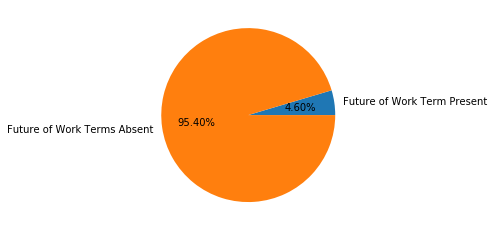

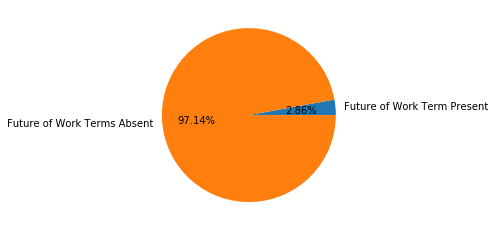

In [162]:
import matplotlib.pyplot as plt
fig = go.Figure(data=[go.Table(
    header=dict(values=['Elective Courses Containing Future of Work Termss', 'Total Number of Elective Courses'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Elective')]['Terms Count'].count(), # 1st column
    len(finaldf[finaldf['Core / Elective']=='Elective'].values)], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()
plt.pie([electivepercent, 1-electivepercent], labels=[ 'Future of Work Term Present', 'Future of Work Terms Absent'], autopct='%1.2f%%')
# plt.label('Elective Courses')
# plt.title('Elective Courses')
plt.show()


fig = go.Figure(data=[go.Table(
    header=dict(values=['Core Courses Containing Future of Work Terms', 'Total Number of Core Courses'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Core')]['Terms Count'].count(), # 1st column
    len(finaldf[finaldf['Core / Elective']=='Core'].values)], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()

plt.pie([corepercent, 1-corepercent], labels=[ 'Future of Work Term Present', 'Future of Work Terms Absent'], autopct='%1.2f%%')
# plt.title('Core Courses')
plt.show()
# plt.label('Core Courses')
# plt.show()

In [163]:
finaldf.head()

,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum,FOW Terms,Terms Count
0,30.0,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,TO 433,Artificial Intelligence for Business,Elective,https://michiganross.umich.edu/courses/artific...,artificial intelligence for business --- we ar...,No Future of work Terms Found,0
1,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,TO 435,Behavioral Economics and Behavioral Operations,Elective,https://michiganross.umich.edu/courses/behavio...,behavioral economics and behavioral operations...,No Future of work Terms Found,0
2,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,MO 300,Behavioral Theory in Management,Core,https://michiganross.umich.edu/courses/behavio...,behavioral theory in management --- this cours...,No Future of work Terms Found,0
3,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,BL 300,Business Law and Ethics,Core,https://michiganross.umich.edu/courses/busines...,business law and ethics --- this is a core cou...,No Future of work Terms Found,0
4,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,BL 310,Negotiation and Dispute Resolution,Elective,https://michiganross.umich.edu/courses/negotia...,negotiation and dispute resolution --- the abi...,No Future of work Terms Found,0


In [164]:
digidf = finaldf[(finaldf['Terms Count']>0)]

# Percentage of universities having digitised content

In [165]:
peruni = len(digidf['University Name'].value_counts())/len(finaldf['University Name'].value_counts())

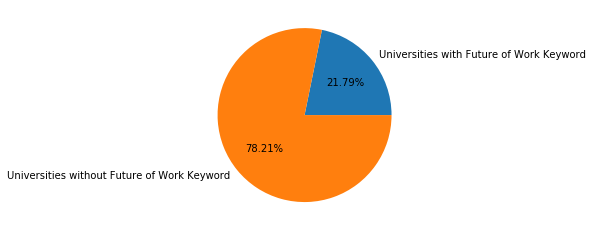

In [166]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['No. of Universities Containing Future of Work Termss', 'Total Number of Universities'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[len(digidf['University Name'].value_counts()), # 1st column
    len(finaldf['University Name'].value_counts())], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()
plt.pie([peruni, 1-peruni], labels=[ 'Universities with Future of Work Keyword', 'Universities without Future of Work Keyword'], autopct='%1.2f%%')
# plt.label('Elective Courses')
# plt.title('Universities')
plt.show()

# Percentage of keywords by location [Division by all the university count]

In [167]:
digidf['Location'].value_counts()

Americas    20
Asia         1
Europe       1
Name: Location, dtype: int64

In [168]:
digidf['University Name'].value_counts()

University of Pennsylvania: Wharton           3
Indiana University: Kelley                    2
University of Washington: Foster              2
Washington University: Olin                   2
University of Pittsburgh: Katz                1
Georgia Institute of Technology: Scheller     1
University of Pennsylvania (Wharton)          1
University of California at Irvine: Merage    1
University of California at Berkeley: Haas    1
New York University: Stern                    1
Northeastern University: D'Amore-McKim        1
Harvard Business School                       1
University of Michigan :Ross                  1
City, University of London: Cass              1
University of Michigan--Ann Arbor             1
Carnegie Mellon: Tepper                       1
CUHK Business School                          1
Name: University Name, dtype: int64

In [169]:
a = digidf['University Name'].value_counts()

In [170]:
a.index

Index(['University of Pennsylvania: Wharton', 'Indiana University: Kelley',
       'University of Washington: Foster', 'Washington University: Olin',
       'University of Pittsburgh: Katz',
       'Georgia Institute of Technology: Scheller',
       'University of Pennsylvania (Wharton) ',
       'University of California at Irvine: Merage',
       'University of California at Berkeley: Haas',
       'New York University: Stern', 'Northeastern University: D'Amore-McKim',
       'Harvard Business School', 'University of Michigan :Ross',
       'City, University of London: Cass', 'University of Michigan--Ann Arbor',
       'Carnegie Mellon: Tepper', 'CUHK Business School'],
      dtype='object')

In [171]:
dict1={}

In [172]:
#Calculating location of universities having digitised content
for j in a.index:
  print(j)
  location = digidf[digidf['University Name']==j]['Location'].unique()
  # print(location[0])
  print(location[0])
  loc= str(location[0])
  if loc in dict1.keys():
    dict1[location[0]]=dict1[location[0]]+1
  else:
    dict1[location[0]]=1
  # print(dict1)

University of Pennsylvania: Wharton
Americas
Indiana University: Kelley
Americas
University of Washington: Foster
Americas
Washington University: Olin
Americas
University of Pittsburgh: Katz
Americas
Georgia Institute of Technology: Scheller
Americas
University of Pennsylvania (Wharton) 
Americas
University of California at Irvine: Merage
Americas
University of California at Berkeley: Haas
Americas
New York University: Stern
Americas
Northeastern University: D'Amore-McKim
Americas
Harvard Business School
Americas
University of Michigan :Ross
Americas
City, University of London: Cass
Europe
University of Michigan--Ann Arbor
Americas
Carnegie Mellon: Tepper
Americas
CUHK Business School
Asia


In [173]:
dict1

{'Americas': 15, 'Europe': 1, 'Asia': 1}

In [174]:
newdict={}

In [175]:
for j,k in dict1.items():
  newdict[j]= k/len(finaldf['University Name'].value_counts())

In [176]:
newdict

{'Americas': 0.19230769230769232,
 'Europe': 0.01282051282051282,
 'Asia': 0.01282051282051282}

In [177]:
tmp = finaldf['Location'].unique()

In [178]:
for j in tmp:
  if j not in newdict.keys():
    dict1[j]=0
    newdict[j]=0

In [179]:
newdict

{'Americas': 0.19230769230769232,
 'Europe': 0.01282051282051282,
 'Asia': 0.01282051282051282,
 'Australia': 0}

In [180]:
dict1

{'Americas': 15, 'Europe': 1, 'Asia': 1, 'Australia': 0}

In [181]:
country=list(dict1.keys())
countrycount=list(dict1.values())

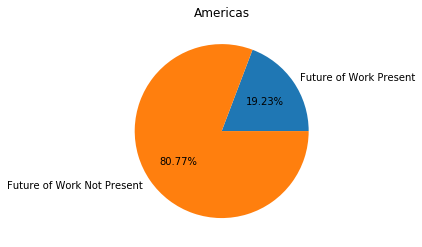

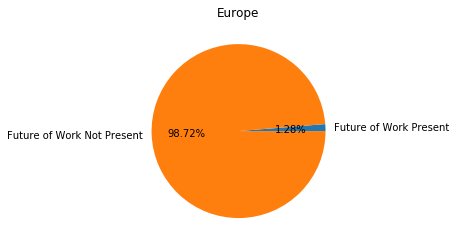

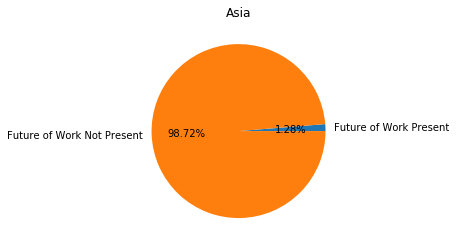

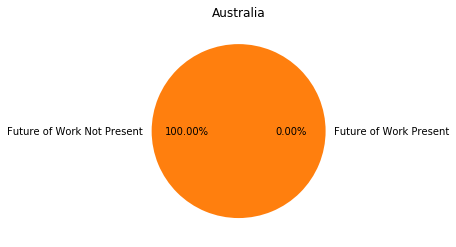

In [182]:
z=0
for i, j in newdict.items():
  fig = go.Figure(data=[go.Table(
      header=dict(values=['Total number of '+country[z]+' Universities containing Future of Work terms', 'Total Number of Universities'],
                  line_color='darkslategray',
                  fill_color='lightskyblue',
                  align='left'),
      cells=dict(values=[countrycount[z],
      len(finaldf['University Name'].value_counts())],
                line_color='darkslategray',
                fill_color='lightcyan',
                align='left'))
  ])

  fig.update_layout(width=500, height=300)
  fig.show()
  plt.pie([j, 1-j], labels=[ 'Future of Work Present', 'Future of Work Not Present'], autopct='%1.2f%%')
# plt.label('Elective Courses')
  plt.title(i)
  plt.show()
  z=z+1

Percentage of universities by location [Division by number of univesities / location]

In [183]:
locationdict={}

In [184]:
a = finaldf['University Name'].value_counts()

In [185]:
#Calculating location of universities having digitised content
for j in a.index:
  print(j)
  location = finaldf[finaldf['University Name']==j]['Location'].unique()
  # print(location[0])
  print(location[0])
  loc= str(location[0])
  if loc in locationdict.keys():
    locationdict[location[0]]=locationdict[location[0]]+1
  else:
    locationdict[location[0]]=1
  # print(dict1)

University of Pennsylvania (Wharton) 
Americas
Washington University: Olin
Americas
Stanford Graduate School of Business
Americas
University of Michigan--Ann Arbor
Americas
Carnegie Mellon: Tepper
Americas
Georgetown University: McDonough
Americas
Northeastern University: D'Amore-McKim
Americas
Insead
Europe
University of Michigan :Ross
Americas
Harvard Business School
Americas
University of Pennsylvania: Wharton
Americas
University of California at Irvine: Merage
Americas
Warwick Business School
Europe
Georgia Institute of Technology: Scheller
Americas
University of Florida: Warrington
Americas
University of Notre Dame: Mendoza
Americas
University of Maryland: Smith
Americas
Vanderbilt University: Owen
Americas
Nanyang Business School, NTU Singapore
Asia
AGSM at UNSW Business School
Australia
Brigham Young University: Marriott
Americas
Emory University: Goizueta
Americas
Columbia Business School
Americas
Texas A & M University: Mays
Americas
Indiana University: Kelley
Americas
Macquar

In [186]:
locationdict

{'Americas': 57, 'Europe': 10, 'Asia': 9, 'Australia': 2}

In [187]:
dict1

{'Americas': 15, 'Europe': 1, 'Asia': 1, 'Australia': 0}

In [188]:
country1 = list(locationdict.items())
country1values = list(locationdict.values())
country2 = list(dict1.items())
country2values = list(dict1.values())

In [189]:
for j,k in dict1.items():
  newdict[j]= k/locationdict[j]

In [190]:
newdict

{'Americas': 0.2631578947368421,
 'Europe': 0.1,
 'Asia': 0.1111111111111111,
 'Australia': 0.0}

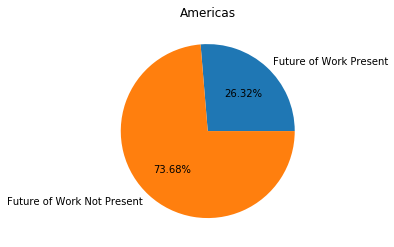

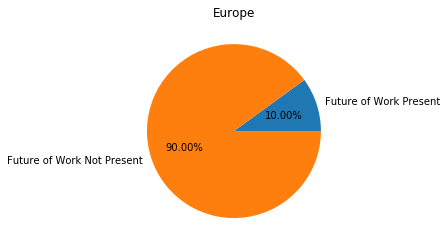

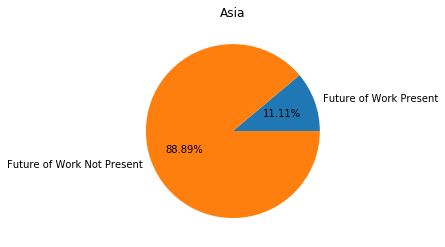

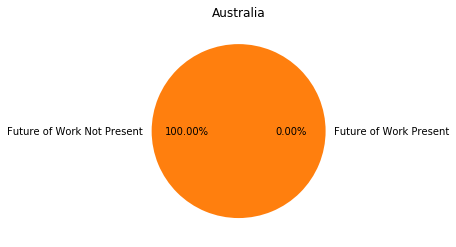

In [191]:
z=0
for i, j in newdict.items():
  fig = go.Figure(data=[go.Table(
      header=dict(values=['Total number of '+i+' Universities containing Future of Work terms', 'Total Number of '+i+' Universities'],
                  line_color='darkslategray',
                  fill_color='lightskyblue',
                  align='left'),
      cells=dict(values=[country2values[z],
      country1values[z]],
                line_color='darkslategray',
                fill_color='lightcyan',
                align='left'))
  ])
  fig.update_layout(width=500, height=300)
  fig.show()
  plt.pie([j, 1-j], labels=[ 'Future of Work Present', 'Future of Work Not Present'], autopct='%1.2f%%')
# plt.label('Elective Courses')
  plt.title(i)
  plt.show()
  z=z+1